#### Checkpoint1

In [1]:
#import libraries
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Load data into companies and rounds2 dataframes
companies = pd.read_csv('companies.txt',delimiter = '\t',encoding='iso-8859-1')
rounds2 = pd.read_csv('rounds2.csv',encoding='iso-8859-1')


In [2]:
#Looking into companies data 
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
#Looking into rounds2 data
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
#Understanding the data columns/variables
companies.info()
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB

****Handling encoding error,Companies and rounds data having special characters ,which needs to be handled.

In [5]:
#remove encoding from companies 'permalink' df
companies['permalink'] = companies.permalink.str.encode("utf-8").str.decode('ascii','ignore')
companies['permalink'].head()

0                    /Organization/-Fame
1                 /Organization/-Qounter
2    /Organization/-The-One-Of-Them-Inc-
3                  /Organization/0-6-Com
4         /Organization/004-Technologies
Name: permalink, dtype: object

In [6]:
#remove encoding from rounds2 'company_permalink' df
rounds2['company_permalink'] = rounds2.company_permalink.str.encode("utf-8").str.decode('ascii','ignore')
rounds2['company_permalink'].head()

0                    /organization/-fame
1                 /ORGANIZATION/-QOUNTER
2                 /organization/-qounter
3    /ORGANIZATION/-THE-ONE-OF-THEM-INC-
4                  /organization/0-6-com
Name: company_permalink, dtype: object

In [7]:
#remove encoding from companies 'name' df
companies['name'] = companies.name.str.encode("utf-8").str.decode('ascii','ignore')
companies['name'].head()

0                     #fame
1                  :Qounter
2    (THE) ONE of THEM,Inc.
3                   0-6.com
4          004 Technologies
Name: name, dtype: object

**Now after removing encoding errors, we can check Unique companies in rounds2 and companies df.

In [8]:
#Unique companies are present in rounds2

#converting company_permalink to lowercase ,as case-sensitivity can impact the outcome
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

#checking unique values           
print("Count of unique companies in rounds2 is : ",len(rounds2['company_permalink'].unique()))  

Count of unique companies in rounds2 is :  66368


In [9]:
#Unique companies are present in the companies 

#converting permalink to lowercase ,,as case-sensitivity can impact the outcome
companies['permalink'] = companies['permalink'].str.lower()

#checking unique values       
print("Count of unique companies in companies file is : ",len(companies['permalink'].unique()))  

Count of unique companies in companies file is :  66368


In [10]:
#Are there any companies in the rounds2 file which are not  present in companies.

companies.loc[~companies['permalink'].isin(rounds2['company_permalink'])]

#Answer - No

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [11]:
#5 Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

#creating master_frame
master_frame = pd.merge(rounds2,companies,left_on='company_permalink',right_on='permalink',how='inner')


#checking rows and variables(columns) using info()
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


#### Data cleaning on master frame

In [12]:
#Taking copy of master_frame for further analysis
master_frame2 = master_frame.copy()

***Columns homepage_url,state_code,region,city,founded_at,funded_at doesn't seems to add value to the business objective,hence dropping these columns from companies dataframe.
Moreover permalink is a redundant column.

In [13]:
master_frame.drop(['homepage_url','state_code','region','city','founded_at','funded_at','permalink'],axis=1,inplace=True)

In [14]:
master_frame.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'raised_amount_usd', 'name', 'category_list',
       'status', 'country_code'],
      dtype='object')

***Checking data for missing values  and the distribution


In [15]:
#Missing values in companies DF
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
raised_amount_usd          19990
name                           1
category_list               3410
status                         0
country_code                8678
dtype: int64

In [16]:
#calculating percentage of missing values wrt total rows
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
raised_amount_usd          17.39
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
dtype: float64

******Percentage of missing values(NAN) in funding_round_code is 72.91%,imputing will not help as the percentage is on high end, hence dropping column.

In [17]:
master_frame = master_frame.drop('funding_round_code',axis=1)
master_frame.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'raised_amount_usd', 'name', 'category_list', 'status', 'country_code'],
      dtype='object')

In [18]:
#Checking distribution of data
master_frame.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


***raised_amount_usd has about 17.4% of missing values, this will impact the analysis during calculation of average(mean value) funding raised.Moreover,Standard deviation is high hence values cannot be imputed with mean/median.

**Hence , Dropping rows for which raised_amount_usd is null.*

In [19]:
#Dropping rows where raised_amount_usd is null
master_frame.dropna(subset=['raised_amount_usd'],inplace=True,axis=0)

In [20]:
#category_list has 2.9% missing values,checking distribution across category_list to find if we can impute values
round(100*(master_frame['category_list'].value_counts()/len(master_frame.index)),2).sort_values(ascending=False).head()

Biotechnology       8.19
Software            6.15
Health Care         2.18
Clean Technology    2.02
Mobile              1.94
Name: category_list, dtype: float64

**Biotechnology has highest percentage ,hence we can impute it with missing values

In [21]:
master_frame['category_list'] = master_frame['category_list'].fillna('Biotechnology')

In [22]:
#Checking master data
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 8 columns):
company_permalink          94959 non-null object
funding_round_permalink    94959 non-null object
funding_round_type         94959 non-null object
raised_amount_usd          94959 non-null float64
name                       94958 non-null object
category_list              94959 non-null object
status                     94959 non-null object
country_code               89108 non-null object
dtypes: float64(1), object(7)
memory usage: 6.5+ MB


In [23]:
#Writing clean masterframe to file 
master_frame.to_csv("master_frame.csv",sep=',',index=False)

### Checkpoint2

In [24]:
#Filtering master data on constraint 5 million to 15 million USD .It will provide list of companies data for which investment 
#is between 5-15 million USD across all funding_type

filtered_df = master_frame[(master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000)]

#checking information on rows/columns
filtered_df.reset_index(drop=True,inplace=True)
filtered_df.info()

#Grouping on 'fundng_round_type'
master_ftype = filtered_df.groupby('funding_round_type')

#1 Average funding amount of venture type
print("Average funding amount of venture type :",round(master_ftype.get_group('venture')['raised_amount_usd'].mean(),2))

#2 Average funding amount of angel type
print("Average funding amount of angel type :",round(master_ftype.get_group('angel')['raised_amount_usd'].mean(),2))

#3 Average funding amount of seed type
print("Average funding amount of seed type :",round(master_ftype.get_group('seed')['raised_amount_usd'].mean(),2))

#4 Average funding amount of private equity type
print("Average funding amount of  private equity type :",round(master_ftype.get_group('private_equity')['raised_amount_usd'].mean(),2))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18848 entries, 0 to 18847
Data columns (total 8 columns):
company_permalink          18848 non-null object
funding_round_permalink    18848 non-null object
funding_round_type         18848 non-null object
raised_amount_usd          18848 non-null float64
name                       18848 non-null object
category_list              18848 non-null object
status                     18848 non-null object
country_code               18037 non-null object
dtypes: float64(1), object(7)
memory usage: 1.2+ MB
Average funding amount of venture type : 8888550.51
Average funding amount of angel type : 7212354.76
Average funding amount of seed type : 6610420.41
Average funding amount of  private equity type : 9283495.68


**Average funding amount of private equity seems to be the highest, let's compare the count of investments in venture and private equity to find the suitable funding type . 

In [25]:
print("Total investments in Venture : " ,master_ftype.get_group('venture')['raised_amount_usd'].count())
print("Total investments in Private Equity :",master_ftype.get_group('private_equity')['raised_amount_usd'].count())

Total investments in Venture :  16598
Total investments in Private Equity : 429


***Even though Private equity funding has average investment of 9283495.68,Venture is more suitable as per the business constraint of investing between 5 million to 15 million per round of investment.because, Number of investments are higher in venture which indicates other investors are investing more in venture . 
As per business objective, Spark funds wants to invest where most investors are investing . Hence,Venture aligns with the business objective .

In [26]:
#filter the data so it only contains the chosen investment type i.e Venture
master_venture = master_ftype.get_group('venture')
master_venture = master_venture.sort_values(by='company_permalink')

### Checkpoint 3

In [27]:
#Splitting master_venture dataframe on the basis of Country_code for further investigation.

master_ctry= master_venture.groupby('country_code')

#For the chosen investment type, creating df top9 with the top nine countries (based on the total investment amount each country has received)
top9 = master_ctry['raised_amount_usd'].sum().sort_values(ascending=False).head(9)
top9 = top9.to_frame()  #top9 dataframe created
top9

,raised_amount_usd
country_code,
USA,1.085313e+11
GBR,5.436844e+09
CHN,5.016561e+09
CAN,3.647010e+09
IND,2.976544e+09
ISR,2.840306e+09
FRA,2.112425e+09
DEU,1.765026e+09
SWE,6.550407e+08


**Next task is to identify the top 3 english speaking countries. 

In [28]:
#Scraping Wiki URL to retrieve list of English speaking countries

#import request,BeautifulSoup for webscraping
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language"
htmlpage = urlopen(url)

#create beautiful soup object
soup = BeautifulSoup(htmlpage,'lxml')

#< a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells. 


row=[]                 #empty array

#find table elements in HTML page to retrieve list of all the tables
table = soup.find_all('table')

#Iterate each 'table' elements to retrieve anchor tag 'a' containing country names with English as official language
#As per assumption , Scraping through first 3 tables on Wiki weblink.

count = 0              #initialising counter
for tb in table:
    if count == 3:                    
        break
    else:
        count = count + 1
        table_rows = tb.find_all('tr')
        for tr in table_rows:
                td = tr.find_all('td')
                for a in td:
                    anchor = a.find_all('a')
                    for i in anchor:
                        row.append(i.text)
    
#Creating dataframe of list of english speaking countries     
english_speaking = pd.DataFrame(row,columns=['country'])


#Cleaning scraped data retrieved for English Speaking Countries from Wikipedia
english_speaking['country'].str.rstrip('\n [] [ ] 0 1 2 3 4 5 6 7 8 9')
english_speaking = english_speaking.drop_duplicates()
english_speaking = english_speaking.reset_index(drop=True)
english_speaking = english_speaking.drop([2])

#Coverting DF to list of values
english_speaking = list(english_speaking['country'])

#Applying map function to convert countries name to upper-case
english_speaking= list(map(lambda i:i.upper(),english_speaking))


#Mapping of country names with country code. Using pycountry module as it contains ISO standard mapping .
import pycountry

#alpha_3 returns 3 digit country code wrt to country name

country_map = {country.name.upper(): country.alpha_3 for country in pycountry.countries}

#Following logic takes each language from list of English speaking countries with reference to Wikipedia URL and gets country_code from country_map
codes_mapping = {}
for i in english_speaking:
    for key,value in country_map.items():
        if i == key:
            codes_mapping.update({key:value})
        else:
            continue

#Now we have english speaking country mapped with its country code,now country_code column of Master_venture can be used to identify 
# the country codes having 'english' as official language
print(codes_mapping)




{'AUSTRALIA': 'AUS', 'NEW ZEALAND': 'NZL', 'UNITED KINGDOM': 'GBR', 'UNITED STATES': 'USA', 'ANTIGUA AND BARBUDA': 'ATG', 'BAHAMAS': 'BHS', 'BARBADOS': 'BRB', 'BELIZE': 'BLZ', 'BOTSWANA': 'BWA', 'BURUNDI': 'BDI', 'CAMEROON': 'CMR', 'CANADA': 'CAN', 'COOK ISLANDS': 'COK', 'DOMINICA': 'DMA', 'ESWATINI': 'SWZ', 'FIJI': 'FJI', 'GHANA': 'GHA', 'GRENADA': 'GRD', 'GUYANA': 'GUY', 'INDIA': 'IND', 'IRELAND': 'IRL', 'JAMAICA': 'JAM', 'KENYA': 'KEN', 'KIRIBATI': 'KIR', 'LESOTHO': 'LSO', 'LIBERIA': 'LBR', 'MALAWI': 'MWI', 'MALTA': 'MLT', 'MARSHALL ISLANDS': 'MHL', 'MAURITIUS': 'MUS', 'NAMIBIA': 'NAM', 'NAURU': 'NRU', 'NIGERIA': 'NGA', 'NIUE': 'NIU', 'PAKISTAN': 'PAK', 'PALAU': 'PLW', 'PAPUA NEW GUINEA': 'PNG', 'PHILIPPINES': 'PHL', 'RWANDA': 'RWA', 'SAINT KITTS AND NEVIS': 'KNA', 'SAINT LUCIA': 'LCA', 'SAINT VINCENT AND THE GRENADINES': 'VCT', 'SAMOA': 'WSM', 'SEYCHELLES': 'SYC', 'SIERRA LEONE': 'SLE', 'SINGAPORE': 'SGP', 'SOLOMON ISLANDS': 'SLB', 'SOUTH AFRICA': 'ZAF', 'SOUTH SUDAN': 'SSD', 'SUDA

In [29]:
#Adding English_Speaking column to master_venture dataframe temporarily which indicates 'Yes' for English speaking countries else 'No'

#Checking country codes from master_venture DF ,if it exists in mapped data 'codes_mapping'

lst=[]
for i in list(master_venture['country_code']):
    if i in codes_mapping.values():
        lst.append('Yes')
    else:
        lst.append('No')


master_venture['English_Speaking'] = lst

#Verify the changes in master_venture dataframe
master_venture.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,English_Speaking
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,Yes
1,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,H2O.ai,Analytics,operating,USA,Yes
3,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Yes
4,/organization/1001-menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,6602694.0,ZenChef,Local Businesses|Restaurants,operating,FRA,No
5,/organization/1001pharmacies-com,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,8900000.0,1001pharmacies.com,Cosmetics|Marketplaces,operating,FRA,No


In [30]:
#TO identify top english speaking countries

#Filtr data on column English_Speaking 
master_venture2 = master_venture[master_venture['English_Speaking'] == 'Yes']

#Do the grouping on based of 'country_code' to calculate total amount of investment per country
eng_spk= master_venture2.groupby('country_code')

#Top 3 English speaking countries based on total investment.
top3_Eng = eng_spk['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

#Creating df for plotting
top3_plt = top3_Eng.to_frame()

top3_Eng #This can be used for plotting 

country_code
USA    1.085313e+11
GBR    5.436844e+09
CAN    3.647010e+09
Name: raised_amount_usd, dtype: float64

In [31]:
#Dropping English_Speaking column as it is of no use further
master_venture = master_venture.drop('English_Speaking',axis=1)
master_venture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 18847
Data columns (total 8 columns):
company_permalink          16598 non-null object
funding_round_permalink    16598 non-null object
funding_round_type         16598 non-null object
raised_amount_usd          16598 non-null float64
name                       16598 non-null object
category_list              16598 non-null object
status                     16598 non-null object
country_code               15895 non-null object
dtypes: float64(1), object(7)
memory usage: 1.1+ MB


### Checkpoint4

In [32]:
#import data from mapping file 

mapping = pd.read_csv('mapping.csv',encoding='iso-8859-1')

#Data  cleaning - : Dropping column 'Blanks' as we are focussed on 8 sectors only. 
mapping.drop(columns= ['Blanks'],inplace=True)
mapping.info()

#Cleaning Data by removing rows with all nullvalues
mapping.dropna(axis=0,how='all',inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 9 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(8), object(1)
memory usage: 48.5+ KB


In [33]:
#Extracting the primary sector of each category list from the category_list column
Sector = master_venture['category_list'].str.split('|',expand=True)

#Adding new column 'primary_sector' ,this column contains the first string before the vertical bar as primary sector
master_venture['primary_sector'] = Sector[0]

In [34]:
#Display updated master_venture information 
master_venture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 18847
Data columns (total 9 columns):
company_permalink          16598 non-null object
funding_round_permalink    16598 non-null object
funding_round_type         16598 non-null object
raised_amount_usd          16598 non-null float64
name                       16598 non-null object
category_list              16598 non-null object
status                     16598 non-null object
country_code               15895 non-null object
primary_sector             16598 non-null object
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [35]:
#Now,let's work on adding new column main_sector mapped with primary sector

#Picking column names from mapping df ,as we want to map on the basis of 8 main sector names ,hence picking column names of 8 main sectors
list1 = list(mapping.columns)
list1 = list1[1:]

#Setting variable value to 1 ,because Primary sector is mapped with main_sector where value is 1 in mapping df
filter_val=1
def funct(x):
    l=[]
    for col in mapping:
        if x[col] == filter_val:
                l.append(col)
    return pd.Series(l)
#Applying function on mapping df and creating new column main_sector
mapping['main_sector'] = mapping.apply(funct, axis=1)

In [36]:
#Display modified mapping df
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,NaN,0,0,0,0,0,0,0,0,NaN
1,3D,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [37]:
#Using modified mapping file to map each primary sector to one of the eight main sectors.
sector_merged = pd.merge(master_venture,mapping.loc[:,['category_list','main_sector']],how='inner',left_on='primary_sector',right_on='category_list')
sector_merged.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,Media,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment
3,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,All Def Digital,Media,operating,USA,Media,Media,Entertainment
4,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,13439178.0,The Speedel Group,Media,closed,CHE,Media,Media,Entertainment


In [38]:
#Dropping column category_list_y as it is duplicate of category_list_x
sector_merged = sector_merged.drop('category_list_y',axis=1)

#Final df  with each company’s main sector (main_sector) mapped to it
sector_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15414 entries, 0 to 15413
Data columns (total 10 columns):
company_permalink          15414 non-null object
funding_round_permalink    15414 non-null object
funding_round_type         15414 non-null object
raised_amount_usd          15414 non-null float64
name                       15414 non-null object
category_list_x            15414 non-null object
status                     15414 non-null object
country_code               14737 non-null object
primary_sector             15414 non-null object
main_sector                15414 non-null object
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


**#Code for a merged data frame with each primary sector mapped to its main sector 

In [39]:
#Display of merged dataframe mapping primary sector with main sector
sector_merged.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment
3,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,All Def Digital,Media,operating,USA,Media,Entertainment
4,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,13439178.0,The Speedel Group,Media,closed,CHE,Media,Entertainment


In [40]:
#Writing df to file
sector_merged.to_csv("main_sector.csv",sep=',',index=False)

In [41]:
sector_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15414 entries, 0 to 15413
Data columns (total 10 columns):
company_permalink          15414 non-null object
funding_round_permalink    15414 non-null object
funding_round_type         15414 non-null object
raised_amount_usd          15414 non-null float64
name                       15414 non-null object
category_list_x            15414 non-null object
status                     15414 non-null object
country_code               14737 non-null object
primary_sector             15414 non-null object
main_sector                15414 non-null object
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


### Checkpoint 5

In [42]:
#Converting top_3 df (containing top 3 english speaking countries) to a dictionary
Dict_x = top3_Eng.to_dict()
#Extracting Top3 english speaking countries from dictionary to a list
list_x = [x for x in Dict_x]
list(list_x)

['USA', 'GBR', 'CAN']

In [43]:
#Three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range
#Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3'
Country1 = list_x[0]
Country2 = list_x[1]
Country3 = list_x[2]
D1 = sector_merged[sector_merged['country_code'] == Country1]
D2 = sector_merged[sector_merged['country_code'] == Country2]
D3 = sector_merged[sector_merged['country_code'] == Country3]



**Sector wise investment Analysis
D1- Represents df for country1; 
D2- Represents df for country2;
D3- Represents df for country3;

In [44]:
#Reset index and display D1 df row/column level information 
D1 = D1.reset_index(drop=True)

D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11235 entries, 0 to 11234
Data columns (total 10 columns):
company_permalink          11235 non-null object
funding_round_permalink    11235 non-null object
funding_round_type         11235 non-null object
raised_amount_usd          11235 non-null float64
name                       11235 non-null object
category_list_x            11235 non-null object
status                     11235 non-null object
country_code               11235 non-null object
primary_sector             11235 non-null object
main_sector                11235 non-null object
dtypes: float64(1), object(9)
memory usage: 877.8+ KB


In [45]:
#Reset index and display D1 df row/column level information 
D2 = D2.reset_index(drop=True)

D2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 10 columns):
company_permalink          584 non-null object
funding_round_permalink    584 non-null object
funding_round_type         584 non-null object
raised_amount_usd          584 non-null float64
name                       584 non-null object
category_list_x            584 non-null object
status                     584 non-null object
country_code               584 non-null object
primary_sector             584 non-null object
main_sector                584 non-null object
dtypes: float64(1), object(9)
memory usage: 45.7+ KB


In [46]:
#Reset index and display D1 df row/column level information 
D3 = D3.reset_index(drop=True)

D3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
company_permalink          398 non-null object
funding_round_permalink    398 non-null object
funding_round_type         398 non-null object
raised_amount_usd          398 non-null float64
name                       398 non-null object
category_list_x            398 non-null object
status                     398 non-null object
country_code               398 non-null object
primary_sector             398 non-null object
main_sector                398 non-null object
dtypes: float64(1), object(9)
memory usage: 31.2+ KB


**Let's check Country1 data

In [47]:
#To get the total number of investments for each main sector in a separate column
D1['Count'] = D1.groupby('main_sector')['raised_amount_usd'].transform(len)

In [48]:
#To total amount invested in each main sector in a separate column
D1['Total_amount_invested'] = D1.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [49]:
#Display D1 with Count and Total_amount_invested
D1.head(10)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,Count,Total_amount_invested
0,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,5000000.0,All Def Digital,Media,operating,USA,Media,Entertainment,580.0,5.000213e+09
1,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,5000000.0,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,Media,Entertainment,580.0,5.000213e+09
2,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,5000000.0,The Huffington Post,Media|News|Publishing,acquired,USA,Media,Entertainment,580.0,5.000213e+09
3,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,5000000.0,The Huffington Post,Media|News|Publishing,acquired,USA,Media,Entertainment,580.0,5.000213e+09
4,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,10000000.0,MatchMine,Media|News|Reviews and Recommendations,closed,USA,Media,Entertainment,580.0,5.000213e+09
5,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,5000000.0,MEDIABONG,Media|Semantic Search|Video,operating,USA,Media,Entertainment,580.0,5.000213e+09
6,/organization/newscorporation,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,12500000.0,News Corp,Media|News|Publishing,ipo,USA,Media,Entertainment,580.0,5.000213e+09
7,/organization/nokeena,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,9400000.0,Ankeena Networks,Media|Software,acquired,USA,Media,Entertainment,580.0,5.000213e+09
8,/organization/nokeena,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,6500000.0,Ankeena Networks,Media|Software,acquired,USA,Media,Entertainment,580.0,5.000213e+09
9,/organization/plumtv,/funding-round/e5109c28c1b4899b068cfa552850c424,venture,5200000.0,PlumTV,Media|Television|Web Hosting,closed,USA,Media,Entertainment,580.0,5.000213e+09


**Let's check Country2 data

In [50]:
#To get total number (or count) of investments for each main sector in a separate column
D2['Count'] = D2.groupby('main_sector')['raised_amount_usd'].transform(len)

In [51]:
#The total amount invested in each main sector in a separate column
D2['Total_amount_invested'] = D2.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [72]:
#Display D2 with Count and Total_amount_invested
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,Count,Total_amount_invested
0,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment,54.0,461511059.0
1,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Entertainment,54.0,461511059.0
2,/organization/flypay,/funding-round/b6854cc7fc06ea76843ec89801f172f2,venture,10700000.0,Flypay,Apps|Customer Service|Restaurants,operating,GBR,Apps,"News, Search and Messaging",73.0,615746235.0
3,/organization/kaazing,/funding-round/0f43f5fbe8b360281ba135c717e47e0d,venture,15000000.0,Kaazing,Apps|Data Integration|Enterprise Software|Info...,operating,GBR,Apps,"News, Search and Messaging",73.0,615746235.0
4,/organization/mindshapes,/funding-round/ad81de5d230ca4ef1876e1c71bf097e3,venture,5000000.0,Mindshapes,Apps|Education|Games|Kids|Textbooks|Virtual Wo...,operating,GBR,Apps,"News, Search and Messaging",73.0,615746235.0


**Let's check Country3 data

In [53]:
#To get total number (or count) of investments for each main sector in a separate column
D3['Count'] = D3.groupby('main_sector')['raised_amount_usd'].transform(len)

In [54]:
#To get total amount invested in each main sector in a separate column
D3['Total_amount_invested'] = D3.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [55]:
#Display D3 with Count and Total_amount_invested
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,Count,Total_amount_invested
0,/organization/500px,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,8800000.0,500px,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,Apps,"News, Search and Messaging",46.0,420121113.0
1,/organization/500px,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,13000000.0,500px,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,Apps,"News, Search and Messaging",46.0,420121113.0
2,/organization/polar-me,/funding-round/8306cc4e0122a91a0803cb5755be62e0,venture,6000000.0,Polar,Apps|Mobile|Software,operating,CAN,Apps,"News, Search and Messaging",46.0,420121113.0
3,/organization/execution-labs,/funding-round/2e2a592b08cdbd58d39f656d57eccd7b,venture,5300000.0,Execution Labs,Games|Incubators,operating,CAN,Games,Entertainment,22.0,154022068.0
4,/organization/gamerizon-studio,/funding-round/6d7257c70e677a29b56cc9b0d1ba03ec,venture,5000000.0,Gamerizon Studio,Games,closed,CAN,Games,Entertainment,22.0,154022068.0


In [56]:
#Let's do sector analysis on D1,representing sector wise information for country1

m = D1.groupby('main_sector')

#Total number of investments
print("Total number of investments :" ,m.Count.count().sum())

#Number of investments sectorwise
print("Number of investments sectorwise :" ,m.Count.count().sort_values(ascending=False))

#Total amount of investment (USD)
print("Total amount of investment (USD) :" ,m.raised_amount_usd.sum().sum())


Total number of investments : 11235
Number of investments sectorwise : main_sector
Others                                     2923
Cleantech / Semiconductors                 2383
Social, Finance, Analytics, Advertising    1912
News, Search and Messaging                 1563
Health                                      908
Manufacturing                               799
Entertainment                               580
Automotive & Sports                         167
Name: Count, dtype: int64
Total amount of investment (USD) : 100426287841.0


**Now it is clear that for country1 ,Top sector is 'Others' and Second best sector is 'Cleantech / Semiconductors' 
let's find out the company which received highest investment under these 2 sectors .

In [57]:
# wrt D1 ,for top sector count-wise, which company received the highest investment?
m.get_group('Others').sort_values(by='raised_amount_usd',ascending=False).head(1)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,Count,Total_amount_invested
6098,/organization/cloudshield-technologies,/funding-round/f7816363f045c194825d511d73bced3e,venture,15000000.0,CloudShield Technologies,Web Hosting,acquired,USA,Web Hosting,Others,2923.0,2.608928e+10


In [58]:
# wrt D1 ,For the second-best sector count-wise, which company received the highest investment?
m.get_group('Cleantech / Semiconductors').sort_values(by='raised_amount_usd',ascending=False).head(1)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,Count,Total_amount_invested
11222,/organization/sunverge-energy-inc,/funding-round/2d73b074d01b5d5b1f553eb5cbd8af2c,venture,15000000.0,"Sunverge Energy, Inc",Commercial Solar|Hardware + Software|Residenti...,operating,USA,Commercial Solar,Cleantech / Semiconductors,2383.0,2.194577e+10


In [59]:
#Let's do sector analysis on D2,representing sector wise information for country2

m2 = D2.groupby('main_sector')

#Total number of investments
print("Total number of investments :",m2.Count.count().sum())

#Number of investments sectorwise
print("Number of investments sectorwise :",m2.Count.count().sort_values(ascending=False))

#Total amount of investment (USD)

print("Total amount of investment (USD) :",m2.raised_amount_usd.sum().sum())

Total number of investments : 584
Number of investments sectorwise : main_sector
Others                                     143
Cleantech / Semiconductors                 134
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: Count, dtype: int64
Total amount of investment (USD) : 5086469206.0


**For country2 ,Top sector is 'others' and Second best sector is 'Cleantech / Semiconductors'
let's find out the company which received highest investment under these 2 sectors .

In [60]:
# wrt D2 ,for top sector count-wise, which company received the highest investment?
m2.get_group('Others').sort_values(by='raised_amount_usd',ascending=False).head(1)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,Count,Total_amount_invested
133,/organization/environmentiq,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,15000000.0,EnvironmentIQ,Software,operating,GBR,Software,Others,143.0,1.249124e+09


In [61]:
# wrt D2 ,For the second-best sector count-wise, which company received the highest investment?
m2.get_group('Cleantech / Semiconductors').sort_values(by='raised_amount_usd',ascending=False).head(1)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,Count,Total_amount_invested
298,/organization/anadigm,/funding-round/d66a723ef94efb39e450f62b6df312c4,venture,15000000.0,Anadigm,Semiconductors|Technology,closed,GBR,Semiconductors,Cleantech / Semiconductors,134.0,1.194670e+09


In [62]:
#Let's do sector analysis on D3,representing sector wise information for CAN

m3 = D3.groupby('main_sector')

#Total number of investments
print("Total number of investments :",m3.Count.count().sum())

#Number of investments sectorwise
print("Number of investments sectorwise :",m3.Count.count().sort_values(ascending=False))

#Total amount of investment (USD)
print("Total amount of investment (USD) :",m3.raised_amount_usd.sum().sum())

Total number of investments : 398
Number of investments sectorwise : main_sector
Cleantech / Semiconductors                 116
Others                                     109
Social, Finance, Analytics, Advertising     52
News, Search and Messaging                  46
Manufacturing                               31
Entertainment                               22
Health                                      20
Automotive & Sports                          2
Name: Count, dtype: int64
Total amount of investment (USD) : 3422009576.0


**For country3 ,Top sector is 'Cleantech / Semiconductors' and Second best sector is 'others'
let's find out the company which received highest investment under these 2 sectors .

In [63]:
# wrt D3 ,for top sector count-wise, which company received the highest investment?
m3.get_group('Cleantech / Semiconductors').sort_values(by='raised_amount_usd',ascending=False).head(1)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,Count,Total_amount_invested
61,/organization/zymeworks,/funding-round/e4dee9b0a5fa30e650e5dea33e1faad8,venture,15000000.0,Zymeworks,Biotechnology,operating,CAN,Biotechnology,Cleantech / Semiconductors,116.0,1.063607e+09


In [64]:
# wrt D3 ,For the second-best sector count-wise, which company received the highest investment?
m3.get_group('Others').sort_values(by='raised_amount_usd',ascending=False).head(1)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,main_sector,Count,Total_amount_invested
199,/organization/quickplay-media,/funding-round/1402ac628c817b20aa9d9243acfd92ae,venture,15000000.0,QuickPlay Media,Enterprise Software,operating,CAN,Enterprise Software,Others,109.0,926137962.0


**Now ,further steps to get required data needed for plotting

****Checkpoint 6

In [65]:
#Creating data for plot 3
#Subsetting D1,D2,D3 
plt_D1 = D1.loc[:,['main_sector','country_code','Count']]
plt_D1.info()
plt_D2 = D2.loc[:,['main_sector','country_code','Count']]
plt_D2.info()
plt_D3 = D3.loc[:,['main_sector','country_code','Count']]
plt_D3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11235 entries, 0 to 11234
Data columns (total 3 columns):
main_sector     11235 non-null object
country_code    11235 non-null object
Count           11235 non-null float64
dtypes: float64(1), object(2)
memory usage: 263.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 3 columns):
main_sector     584 non-null object
country_code    584 non-null object
Count           584 non-null float64
dtypes: float64(1), object(2)
memory usage: 13.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
main_sector     398 non-null object
country_code    398 non-null object
Count           398 non-null float64
dtypes: float64(1), object(2)
memory usage: 9.4+ KB


In [66]:

#Retrieving top sectors from D1 (Country1)
f = {'country_code': 'first', 'Count': 'count'}
plt3_1 = plt_D1.groupby('main_sector',as_index=False).agg(f)
plt3_1 = plt3_1.sort_values(by='Count',ascending=False).head(3)
plt3_1.reset_index(drop=True)
#Retrieving top sectors from D2 (Country2)
plt3_2 = plt_D2.groupby('main_sector',as_index=False).agg(f)
plt3_2 = plt3_2.sort_values(by='Count',ascending=False).head(3)
plt3_2.reset_index(drop=True)
#Retrieving top sectors from D3 (Country3)
plt3_3 = plt_D3.groupby('main_sector',as_index=False).agg(f)
plt3_3 = plt3_3.sort_values(by='Count',ascending=False).head(3)
plt3_3.reset_index(drop=True)

,main_sector,country_code,Count
0,Cleantech / Semiconductors,CAN,116
1,Others,CAN,109
2,"Social, Finance, Analytics, Advertising",CAN,52


In [67]:
#Now,Merging top sectors information for the plot 
df_merged = plt3_1.append(plt3_2, ignore_index=True)
df_merged = df_merged.append(plt3_3, ignore_index=True)
df_merged.head(10)

,main_sector,country_code,Count
0,Others,USA,2923
1,Cleantech / Semiconductors,USA,2383
2,"Social, Finance, Analytics, Advertising",USA,1912
3,Others,GBR,143
4,Cleantech / Semiconductors,GBR,134
5,"Social, Finance, Analytics, Advertising",GBR,98
6,Cleantech / Semiconductors,CAN,116
7,Others,CAN,109
8,"Social, Finance, Analytics, Advertising",CAN,52


In [68]:
# creating df for plotting que 1
plt_x = filtered_df.copy()
plt_x['Percentage']  = 100*round(plt_x.groupby('funding_round_type')['raised_amount_usd'].transform('count')/len(plt_x.index),2)
plt_x['average_amt'] = round(plt_x.groupby('funding_round_type')['raised_amount_usd'].transform('mean'))

#Retrieve data of only funding type -venture,seed,private equity
plt_x = plt_x.loc[(plt_x['funding_round_type']=='venture') | (plt_x['funding_round_type']=='seed') | (plt_x['funding_round_type']=='private_equity')]
#display data for plot
plt_x.head() 

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,Percentage,average_amt
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,88.0,8888551.0
1,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.0,H2O.ai,Analytics,operating,USA,88.0,8888551.0
2,/organization/1-800-publicrelations-inc-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,6000000.0,"1-800-PublicRelations, Inc.",Internet Marketing|Media|Public Relations,operating,USA,2.0,9283496.0
3,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,88.0,8888551.0
4,/organization/1001-menus,/funding-round/645b4cd895450b8e0268027cd7813047,venture,6602694.0,ZenChef,Local Businesses|Restaurants,operating,FRA,88.0,8888551.0


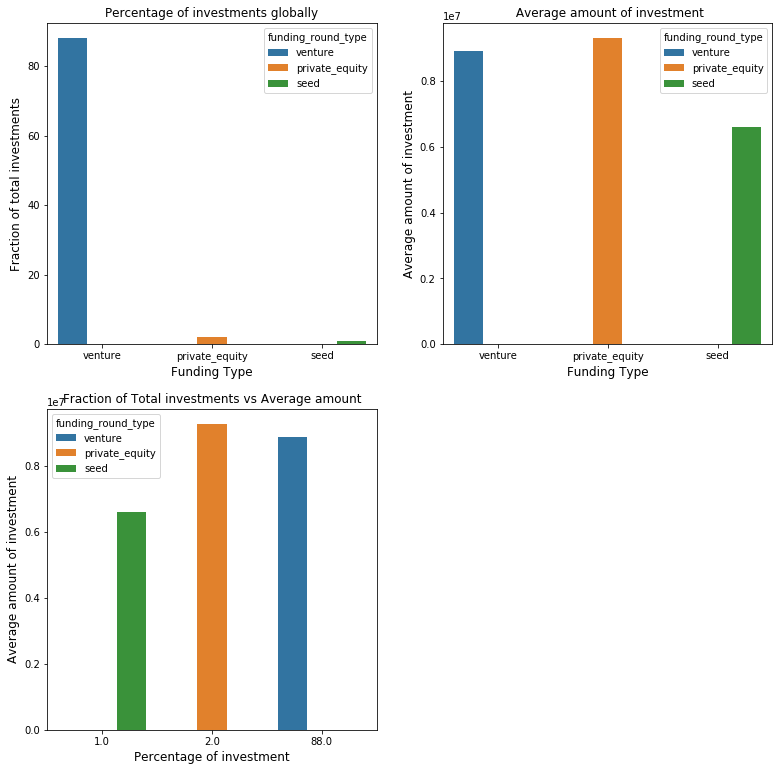

In [69]:
#Plot-1 

plt.figure(facecolor='w', edgecolor='r',figsize=(13,13))
plt.subplot(221)
sns.barplot(x='funding_round_type',y='Percentage',hue='funding_round_type',data=plt_x)
plt.title('Percentage of investments globally')
plt.xlabel('Funding Type',fontsize=12)
plt.ylabel('Fraction of total investments',fontsize=12)
#
plt.subplot(222)
sns.barplot(x='funding_round_type',y='average_amt',hue='funding_round_type',data=plt_x)
plt.title(' Average amount of investment')
plt.xlabel('Funding Type',fontsize=12)
plt.ylabel('Average amount of investment',fontsize=12)
#
plt.subplot(223)
sns.barplot(x='Percentage',y='average_amt',hue='funding_round_type',data=plt_x)
plt.title('Fraction of Total investments vs Average amount')
plt.xlabel('Percentage of investment',fontsize=12)
plt.ylabel('Average amount of investment',fontsize=12)
plt.show()


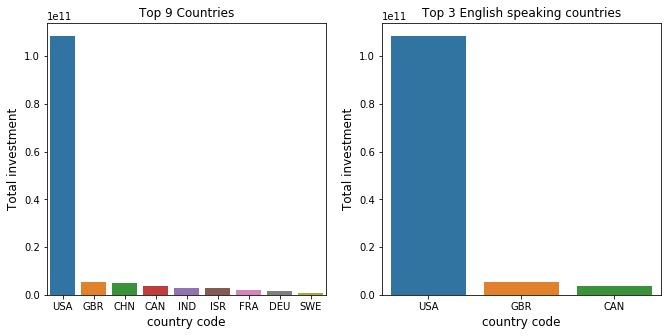

In [70]:
#Plot-2
#Plot demonstrates top 9 countries on the basis of total amount of investment in funding type 'Venture'
# Following plot has both 'English' and 'Non English speaking countries'
plt.figure(figsize=(11,11),facecolor='w', edgecolor='g')
plt.subplot(221)
sns.barplot(x=top9.index,y='raised_amount_usd',data=top9)
plt.title('Top 9 Countries')
plt.xlabel('country code',fontsize=12)
plt.ylabel('Total investment',fontsize=12)

#English Speaking countries 
plt.subplot(222)
sns.barplot(x=top3_plt.index,y='raised_amount_usd',data=top3_plt)
plt.title('Top 3 English speaking countries')
plt.xlabel('country code',fontsize=12)
plt.ylabel('Total investment',fontsize=12)
plt.show()

Text(0, 0.5, 'Total number of investments')

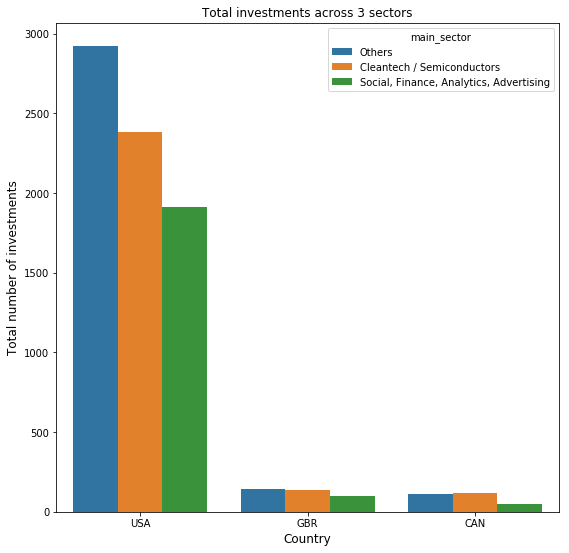

In [71]:
#Plot-3
#Plot demonstrates the number of investments in the top 3 sectors of the top 3 countries on one chart 

plt.figure(figsize=(9,9),facecolor='w', edgecolor='g')
plt.subplot(111)
sns.barplot(x='country_code',y='Count',hue='main_sector',data=df_merged)
plt.title('Total investments across 3 sectors')
plt.xlabel('Country',fontsize=12)
plt.ylabel('Total number of investments',fontsize=12)
